### Fashion-MNIST Clothing Photograph Dataset
The Fashion-MNIST dataset is proposed as a more challenging replacement dataset for the MNIST dataset.

It is a dataset comprised of 60,000 small square 28×28 pixel grayscale images of items of 10 types of clothing, such as shoes, t-shirts, dresses, and more.

Keras provides access to the Fashion-MNIST dataset via the fashion_mnist.load_dataset() function. It returns two tuples, one with the input and output elements for the standard training dataset, and another with the input and output elements for the standard test dataset.

In [3]:
import matplotlib.pyplot as plt

In [4]:
# example of loading the fashion_mnist dataset
from keras.datasets.fashion_mnist import load_data
# load the images into memory
(trainX, trainy), (testX, testy) = load_data()
# summarize the shape of the dataset
print('Train', trainX.shape, trainy.shape)
print('Test', testX.shape, testy.shape)

Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)


The images are grayscale with a black background (0 pixel value) and the items of clothing are in white ( pixel values near 255). This means if the images were plotted, they would be mostly black with a white item of clothing in the middle.

We can plot some of the images from the training dataset using the matplotlib library with the imshow() function and specify the color map via the ‘cmap‘ argument as ‘gray‘ to show the pixel values correctly.

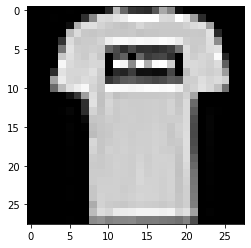

In [8]:
# plot raw pixel data
plt.imshow(trainX[1], cmap='gray')

Alternately, the images are easier to review when we reverse the colors and plot the background as white and the clothing in black.

#### They are easier to view as most of the image is now white with the area of interest in black. This #### can be achieved using a reverse grayscale color map, as follows

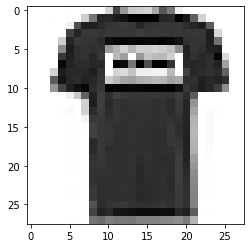

In [11]:
# plot raw pixel data
plt.imshow(trainX[1], cmap='gray_r')

### The example below plots the first 100 images from the training dataset in a 10 by 10 square.

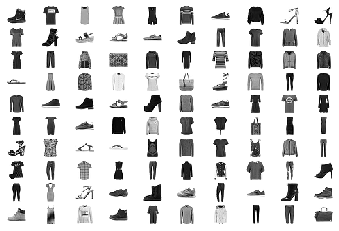

In [23]:
# example of loading the fashion_mnist dataset
from keras.datasets.fashion_mnist import load_data
from matplotlib import pyplot

# load the images into memory
(trainX, trainy), (testX, testy) = load_data()

# plot images from the training dataset
for i in range(100):
    # define subplot
    pyplot.subplot(10, 10, 1 + i)
    
    # turn off axis
    pyplot.axis('off')
    
    # plot raw pixel data
    pyplot.imshow(trainX[i], cmap='gray_r')

pyplot.show()

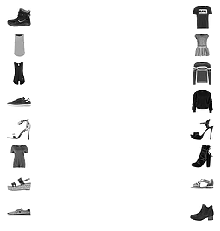

In [32]:
for i in range(16):
    # define subplot
    pyplot.subplot(8, 2, 1 + i)
    
    # turn off axis
    pyplot.axis('off')
    
    # plot raw pixel data
    pyplot.imshow(trainX[i], cmap='gray_r')

pyplot.show()

We will use the images in the training dataset as the basis for training a Generative Adversarial Network.

### Specifically, the generator model will learn how to generate new plausible items of clothing  and using a discriminator that will try to distinguish between real images from the Fashion MNIST training dataset and new images output by the generator model.

## Unconditional GAN for Fashion-MNIST

In this section, we will develop an unconditional GAN for the Fashion-MNIST dataset.

The first step is to define the models.

The discriminator model takes as input one 28×28 grayscale image and outputs a binary prediction as to whether the image is real (class=1) or fake (class=0). 
It is implemented as a modest convolutional neural network using best practices for GAN design such as using the LeakyReLU activation function with a slope of 0.2, using a 2×2 stride to downsample, and the adam version of stochastic gradient descent with a learning rate of 0.0002 and a momentum of 0.5

The define_discriminator() function below implements this, defining and compiling the discriminator model and returning it. 
The input shape of the image is parameterized as a default function argument in case you want to re-use the function for your own image data later

In [ ]:
# define the standalone discriminator model
def define_discriminator(in_shape=(28,28,1)):
	model = Sequential()
    # downsample
    model.add(Conv2D(128, (3,3), strides=(2,2), padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    # downsample
    model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # classifier
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model